In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
rng = np.random.default_rng(100921)

x = np.linspace(0, 1, 400)
n_templates = 5

W_true = np.ones((len(x), n_templates))
W_true[:, 1] = 2 * x - 1
W_true[:, 2] = 6 * (x ** 2 - x) + 1
W_true[:, 3] = 20 * x ** 3 - 30 * x ** 2 + 12 * x - 1
W_true[:, 4] = 70 * x ** 4 - 140 * x ** 3 + 90 * x ** 2 - 20 * x + 1

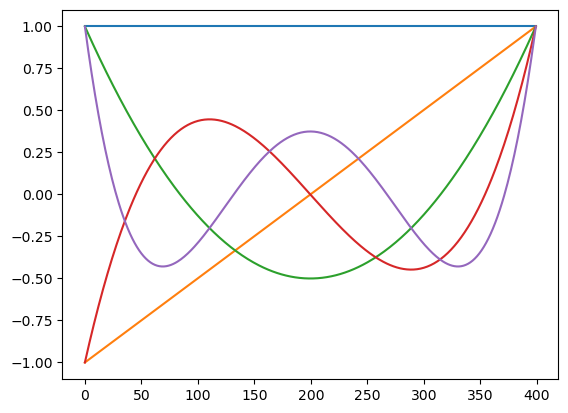

In [3]:
plt.plot(W_true)

In [4]:
n_test = 5000
H_true = rng.uniform(-1, 2, (W_true.shape[-1], n_test))

X = W_true @ H_true

In [5]:
# H_lsq = np.linalg.inv(W_true.T @ W_true) @ W_true.T @ X
H_lsq = np.linalg.lstsq(W_true, X)[0]
recon_lsq = W_true @ H_lsq

/var/folders/xw/4pb83sjj51719ty_kd4qrpgc0000gn/T/ipykernel_47650/3266066277.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  H_lsq = np.linalg.lstsq(W_true, X)[0]


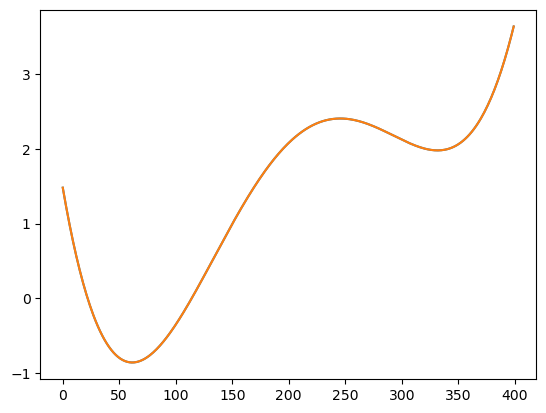

In [6]:
idx = 50
plt.plot(X[:, idx])
plt.plot(recon_lsq[:, idx])

In [7]:
from scipy.optimize import nnls

In [8]:
H_nnls = np.zeros_like(H_lsq)

for i in range(X.shape[1]):
    coeff, residual = nnls(W_true, X[:, i])

    H_nnls[:, i] = coeff

In [9]:
recon_nnls = W_true @ H_nnls

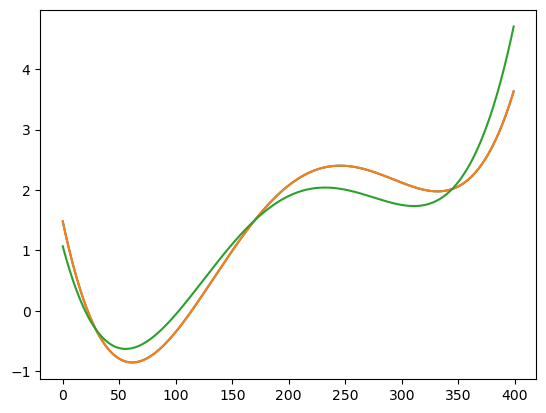

In [10]:
idx = 50
plt.plot(X[:, idx])
plt.plot(recon_lsq[:, idx])
plt.plot(recon_nnls[:, idx])

In [11]:
import sys
sys.path.insert(0, "py/")
print(sys.path)
from noodles import nnls

['py/', '/Users/dylan/repos/noodles', '/Users/dylan/miniforge3/envs/tf/lib/python38.zip', '/Users/dylan/miniforge3/envs/tf/lib/python3.8', '/Users/dylan/miniforge3/envs/tf/lib/python3.8/lib-dynload', '', '/Users/dylan/miniforge3/envs/tf/lib/python3.8/site-packages', '/Users/dylan/repos/desipoint']


In [12]:
%timeit nnls(W_true, X[:, idx])

/Users/dylan/repos/noodles/py/noodles.py:28: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  s[P] = np.linalg.lstsq(A_p, y)[0]


106 µs ± 752 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
H_noodles = np.zeros_like(H_lsq)

for i in range(X.shape[1]):
    H_noodles[:, i] = nnls(W_true, X[:, i])

In [14]:
recon_noodles = W_true @ H_noodles

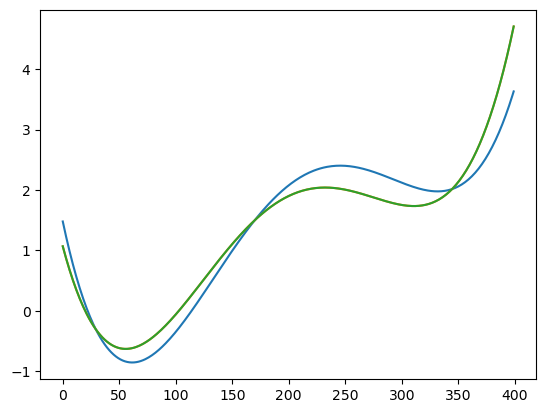

In [15]:
idx = 50
plt.plot(X[:, idx])
plt.plot(recon_nnls[:, idx])
plt.plot(recon_noodles[:, idx])